<a href="https://colab.research.google.com/github/aminaakm/amina/blob/main/comparison_of_sbp_(states).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving dataforpy.csv to dataforpy.csv


Top 5 states by average SBP:
                   stateid     sbp_avg
2                11 Sikkim  140.308396
24          31 Lakshadweep  138.918969
28  35 Andaman and Nicobar  135.422436
4              13 Nagaland  134.634992
22                3 Punjab  133.806697


/tmp/ipython-input-2286575734.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


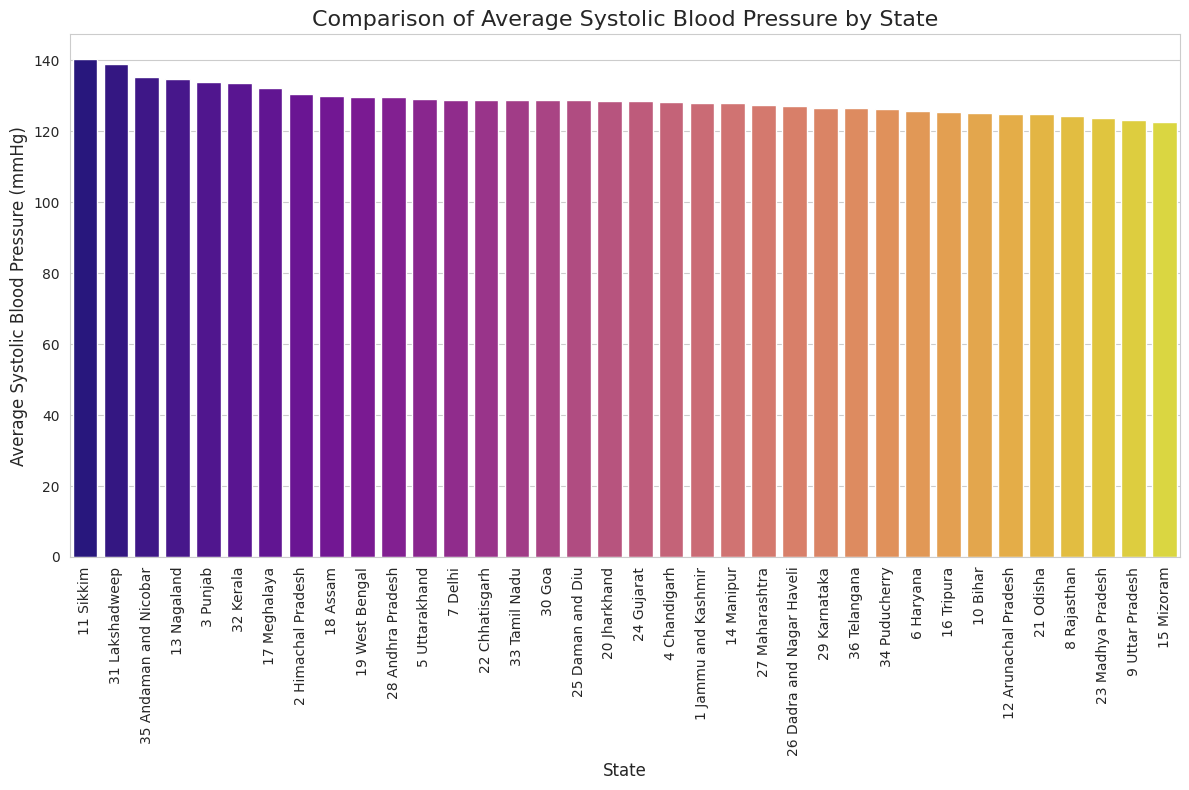

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
# IMPORTANT: Replace 'your_file.csv' with the actual name of your uploaded file.
file_name = 'dataforpy.csv'
df = pd.read_csv(file_name)


# --- 2. FIX and Clean Data ---
# Convert 'sbp_avg' to a number. If any value can't be converted, it becomes blank (NaN).
df['sbp_avg'] = pd.to_numeric(df['sbp_avg'], errors='coerce')

# Drop any rows that now have a blank 'sbp_avg' value.
df.dropna(subset=['sbp_avg'], inplace=True)


# --- 3. Prepare Data for Comparison ---
# Group by the 'stateid' column and calculate the mean of the cleaned 'sbp_avg'.
state_comparison_df = df.groupby('stateid')['sbp_avg'].mean().reset_index()

# Sort the results to make the graph easier to read.
state_comparison_df = state_comparison_df.sort_values(by='sbp_avg', ascending=False)

print("Top 5 states by average SBP:")
print(state_comparison_df.head())


# --- 4. Create the Graph ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    x='stateid',
    y='sbp_avg',
    data=state_comparison_df,
    palette='plasma'
)

plt.title("Comparison of Average Systolic Blood Pressure by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Systolic Blood Pressure (mmHg)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()